# Equitable AI for Dermatology

AI is transforming healthcare, yet dermatology AI tools often underperform for people with darker skin tones due to a lack of diverse training data. This gap can lead to diagnostic errors, delayed treatments, and health disparities for underserved communities.

This challenge from Break Through Tech and the Algorithmic Justice League invites you to help address this gap by building an inclusive machine learning model for dermatology.

In [ ]:
# Mount data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load necessary packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# access the datafile
trainDataSet_filename = os.path.join(os.getcwd(), "drive/MyDrive/BTTAI Kaggle AJL Team13/bttai-ajl-2025", "train.csv")
df = pd.read_csv(trainDataSet_filename)

In [ ]:
df = df['md5hash','']

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,ddi_scale
0,fd06d13de341cc75ad679916c5d7e6a6,4,4,prurigo-nodularis,benign-epidermal,benign,NaN,34
1,a4bb4e5206c4e89a303f470576fc5253,1,1,basal-cell-carcinoma-morpheiform,malignant-epidermal,malignant,NaN,12
2,c94ce27e389f96bda998e7c3fa5c4a2e,5,5,keloid,inflammatory,non-neoplastic,1 Diagnostic,56
3,ebcf2b50dd943c700d4e2b586fcd4425,3,3,basal-cell-carcinoma,malignant-epidermal,malignant,NaN,34
4,c77d6c895f05fea73a8f3704307036c0,1,1,prurigo-nodularis,benign-epidermal,benign,NaN,12
...,...,...,...,...,...,...,...,...
2855,aa4f94e33bbc118e2a95f7a8ad0344a1,2,2,folliculitis,inflammatory,non-neoplastic,NaN,12
2856,fb1feb5dbf0038eee9348a3740cef6f9,1,1,superficial-spreading-melanoma-ssm,malignant-melanoma,malignant,NaN,12
2857,811f74634ec6dd7022aa04e4968fea38,1,1,acne,inflammatory,non-neoplastic,NaN,12
2858,9983c4ae2e5b505b746da35d068d00ec,3,4,eczema,inflammatory,non-neoplastic,NaN,34


## Data Profiling and Visualization

### Data Variables
- md5hash (string) is the unique identifier
- fitpatric_scale (int) is a nominal int in range [-1, 0) and [1, 6] indicating self-described (Fitzpatrick Skin Type) FST
- fitzpatrick_centaur (int)	nominal int in the range [-1, 0) and [1, 6] indicating FST assigned by Centaur Labs, a medical data annotation firm
- label (string) is our dependent variable indicating the medical diagnosis. 21 possible values
- nine_paritition_label (string) is a categorical variable indicating one of nine diagnostic categories
- three_paritition_label (string) is a categorical variable indicating one of three diagnostic categories
- qc (int) a nominal int for quality control check by a Board-certified dermatologist.
  - 1: Diagnostic - the image shows an good example of the skin condition
  - 2: Characteristic - the image shows something that could be the skin condition, but isn't diagnostic
  - 3: Wrongly labelled - the image shows something that is definitely not the labeled condition
  - 4: Other
  - 5: Potentially - not clearly diagnostic but not necessarily mislabeled, further testing would be required
- ddi_scale (int) A column used to reconcile this dataset with another dataset (may not be relevant)









In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   md5hash                2860 non-null   object
 1   fitzpatrick_scale      2860 non-null   int64 
 2   fitzpatrick_centaur    2860 non-null   int64 
 3   label                  2860 non-null   object
 4   nine_partition_label   2860 non-null   object
 5   three_partition_label  2860 non-null   object
 6   qc                     90 non-null     object
 7   ddi_scale              2860 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 178.9+ KB


In [ ]:
# Not super useful because Fitzpatrick variables are nominal variables
df.describe()

,fitzpatrick_scale,fitzpatrick_centaur,ddi_scale
count,2860.000000,2860.000000,2860.000000
mean,2.524476,2.095455,23.547552
std,1.474428,1.510942,15.530522
min,-1.000000,-1.000000,-1.000000
25%,2.000000,1.000000,12.000000
50%,2.000000,2.000000,12.000000
75%,3.000000,3.000000,34.000000
max,6.000000,6.000000,56.000000


In [ ]:
# Number of unique values per variable
df.nunique()

,0
md5hash,2860
fitzpatrick_scale,7
fitzpatrick_centaur,7
label,21
nine_partition_label,7
three_partition_label,3
qc,5
ddi_scale,4


In [ ]:
# Explore label variable
print(df["label"].unique())

['prurigo-nodularis' 'basal-cell-carcinoma-morpheiform' 'keloid'
 'basal-cell-carcinoma' 'seborrheic-keratosis' 'eczema' 'folliculitis'
 'squamous-cell-carcinoma' 'actinic-keratosis' 'mycosis-fungoides'
 'acne-vulgaris' 'dyshidrotic-eczema' 'melanoma' 'epidermal-nevus'
 'malignant-melanoma' 'pyogenic-granuloma' 'dermatofibroma'
 'kaposi-sarcoma' 'acne' 'dermatomyositis'
 'superficial-spreading-melanoma-ssm']


In [ ]:
# identify variables with missing values
df.isna().sum()

,0
md5hash,0
fitzpatrick_scale,0
fitzpatrick_centaur,0
label,0
nine_partition_label,0
three_partition_label,0
qc,2770
ddi_scale,0


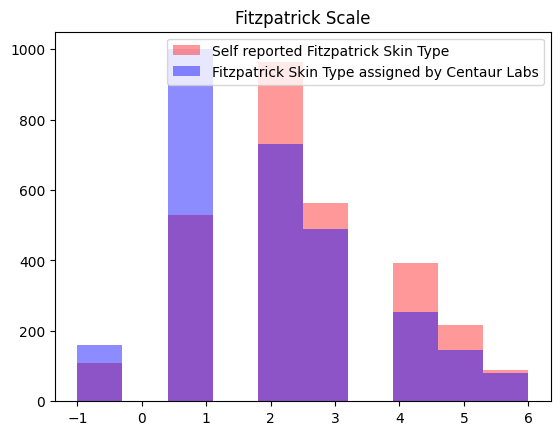

In [ ]:
# visualize fitzpatrick scale

plt.hist(df["fitzpatrick_scale"], alpha=0.40, color='red')
plt.hist(df["fitzpatrick_centaur"], alpha=0.45, color='blue')

plt.title("Fitzpatrick Scale")

plt.legend(["Self reported Fitzpatrick Skin Type",
            "Fitzpatrick Skin Type assigned by Centaur Labs"])

plt.show()

In [ ]:
# Values of the label variable
df["label"].value_counts()

,count
label,
squamous-cell-carcinoma,407
basal-cell-carcinoma,328
folliculitis,239
acne-vulgaris,234
melanoma,181
eczema,143
acne,128
mycosis-fungoides,127
actinic-keratosis,122


In [ ]:
df["qc"].value_counts()

,count
qc,
1 Diagnostic,76
5 Potentially,7
3 Wrongly labelled,4
2 Characteristic,2
4 Other,1


In [ ]:
df["nine_partition_label"].value_counts()

,count
nine_partition_label,
inflammatory,1017
malignant-epidermal,900
malignant-melanoma,342
benign-epidermal,231
benign-dermal,134
malignant-cutaneous-lymphoma,127
malignant-dermal,109


In [ ]:
df["three_partition_label"].value_counts()

,count
three_partition_label,
malignant,1478
non-neoplastic,1017
benign,365


In [ ]:
# find all observations where qc = 3 (image is wrongly labelled) or qc = 5 (requires further testing to determine if image is misleading)
df.query("(qc == '3 Wrongly labelled' | qc == '5 Potentially')")

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,ddi_scale
840,a2df70f5967a76aa96825313635e18ef,3,2,folliculitis,inflammatory,non-neoplastic,3 Wrongly labelled,34
860,2e3b410b4c54081cac94ccfa3f9f8c8b,6,6,dermatomyositis,inflammatory,non-neoplastic,5 Potentially,56
961,424ca461d8e2d667d55f7af7c9fc035e,1,1,pyogenic-granuloma,benign-dermal,benign,5 Potentially,12
1405,fd14286c22b23ef54155d425c5967eed,2,2,acne,inflammatory,non-neoplastic,5 Potentially,12
1494,0adf95c81c80ef8b473022a203a0cb21,2,2,mycosis-fungoides,malignant-cutaneous-lymphoma,malignant,5 Potentially,12
1503,c5c075da4848a22e7b904957deb7c609,5,5,acne,inflammatory,non-neoplastic,3 Wrongly labelled,56
1560,b1881c3f24c95c6950b3d9e131406edb,1,1,prurigo-nodularis,benign-epidermal,benign,5 Potentially,12
1599,73ac23918c9537a8c792938b64f779e0,4,4,squamous-cell-carcinoma,malignant-epidermal,malignant,5 Potentially,34
1735,a7f4b5820d83edb709b22965f6b14135,2,2,folliculitis,inflammatory,non-neoplastic,3 Wrongly labelled,12
1994,75ec263a2f60119eb0e1f580a7aaec12,2,1,folliculitis,inflammatory,non-neoplastic,5 Potentially,12


## Data Preprocessing

In [ ]:
# Necessary Imports
from collections import Counter
import keras
from keras import Sequential
from keras import layers
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout, Input
from keras.optimizers import Adam
from PIL import Image
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
import glob
from tqdm import tqdm

In [ ]:
def get_image_data(directory):
    """
    Extracts image dimensions and pixel channel values from images in the given directory.

    Args:
        directory (str): Path to the directory containing image files.

    Returns:
        dimensions (list): A list of tuples containing image dimensions and channel count (width, height, channels).
        channel_values (numpy.ndarray): A flattened array of RGB pixel values from all images.
    """
    dimensions = []  # List to store image dimensions
    channel_values = []  # List to store pixel values for RGB images

    # Walk through the directory and its subdirectories
    for root, _, files in os.walk(directory):
        for file in files:  # Iterate over each file
            # Check if the file is a JPEG
            if file.lower().endswith('.jpg') or file.lower().endswith('.jpeg'):
                file_path = os.path.join(root, file)  # Get the full file path
                try:
                    with Image.open(file_path) as img:  # Open the image file
                        width, height = img.size  # Get the width and height of the image
                        channels = len(img.getbands())  # Get the number of color channels
                        dimensions.append((width, height, channels))  # Append dimensions to the list

                        # Collect pixel values if the image has RGB channels
                        if channels == 3:
                            pixels = np.array(img)  # Convert image to a NumPy array
                            channel_values.append(pixels.reshape(-1, 3))  # Flatten and append pixel values
                except Exception as e:
                    # Print an error message if the file cannot be processed
                    print(f"Could not process file {file_path}: {e}")

    # Combine all channel values into a single array if any RGB images exist
    if channel_values:
        channel_values = np.concatenate(channel_values, axis=0)

    return dimensions, channel_values  # Return the dimensions and pixel values
    # Remember that dimentions and channel values are both lists; they need to be accessed accordingly

In [ ]:
directory = '/content/drive/MyDrive/BTTAI Kaggle AJL Team13/bttai-ajl-2025/train/train'
dimensions, channel_values = get_image_data(directory)

In [ ]:
print(dimensions)
print(channel_values)

[(459, 304, 3), (2188, 1774, 3), (346, 408, 3), (287, 192, 3), (501, 890, 3), (384, 289, 3), (619, 493, 3), (615, 507, 3), (291, 192, 3), (319, 314, 3), (443, 296, 3), (492, 683, 3), (577, 457, 3), (288, 307, 3), (487, 404, 3), (455, 323, 3), (414, 327, 3), (465, 406, 3), (399, 282, 3), (347, 385, 3), (674, 550, 3), (368, 233, 3), (730, 555, 3), (659, 672, 3), (750, 771, 3), (619, 365, 3), (911, 575, 3), (1374, 1225, 3), (500, 385, 3), (434, 268, 3), (411, 298, 3), (487, 331, 3), (620, 621, 3), (452, 313, 3), (1478, 1873, 3), (1899, 1260, 3), (1181, 720, 3), (510, 517, 3), (661, 532, 3), (329, 293, 3), (397, 318, 3), (292, 192, 3), (368, 302, 3), (296, 213, 3), (968, 904, 3), (1276, 1808, 3), (800, 494, 3), (403, 399, 3), (306, 286, 3), (712, 570, 3), (671, 573, 3), (2354, 1248, 3), (1805, 1467, 3), (288, 292, 3), (247, 185, 3), (300, 429, 3), (300, 210, 3), (438, 270, 3), (287, 192, 3), (447, 302, 3), (469, 262, 3), (443, 282, 3), (849, 879, 3), (466, 339, 3), (552, 380, 3), (246, 260

In [ ]:
#allows us to get images from directory into IDE
def get_image(index, df): # index must be from 0 to len(df) - 1
    num_rows = df.shape[0]
    if index < 0 or index >= num_rows:
        return "cannot get requested image"
    else:
        img_dir = df.loc[index, 'label']
        img_hash = df.loc[index, 'md5hash']

        img_path = os.path.join(os.getcwd(), "drive/MyDrive/BTTAI Kaggle AJL Team13/bttai-ajl-2025/train/train", img_dir, img_hash + ".jpg")
        print(img_path)

        # Check if the image exists in the specified directory
        if os.path.exists(img_path):
            # Open and display the image using PIL
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')  # Turn off axis labels for a cleaner display

        else:
            return "Image not found at the specified path."

/content/drive/MyDrive/BTTAI Kaggle AJL Team13/bttai-ajl-2025/train/train/epidermal-nevus/fac57a2990fe1215d87e4df8cb6eb9e9.jpg


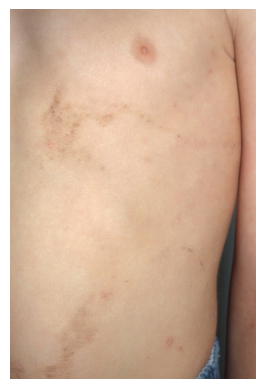

In [ ]:
get_image(30, df) # this will display any index image in the original dataframe

In [ ]:
# This CROPS the image to the indicated size - it does not reshape.
# creates a data matrix where each row is a 1 x 128^2*3 vector that has all the pixel values for one label
def load_images_by_label(label, image_size=(128, 128)):
    # Directory where the images are stored (assuming each label has its own folder)
    img_dir = os.path.join(directory, label)  # Update the path as needed

    # Get all image file paths for the given label
    img_paths = glob.glob(os.path.join(img_dir, '*.jpg'))  # Assuming images are .jpg

    # Initialize a list to store image data and variables for shape
    image_data = []
    img_shape = None

    # Loop over each image path
    for img_path in img_paths:
        # Open image
        img = Image.open(img_path)

        # Get original dimensions of the image
        img_width, img_height = img.size

        # Calculate the cropping box (centered crop)
        left = (img_width - image_size[0]) // 2
        top = (img_height - image_size[1]) // 2
        right = (img_width + image_size[0]) // 2
        bottom = (img_height + image_size[1]) // 2

        # Crop the center portion of the image
        img_cropped = img.crop((left, top, right, bottom))

        # Convert image to a numpy array and flatten it
        img_array = np.array(img_cropped).flatten()

        # Store the image data
        image_data.append(img_array)

        # Get image shape (first time we encounter it)
        if img_shape is None:
            img_shape = img_cropped.size + (3,)  # Assuming RGB images (3 channels)

    # Convert image_data list to a numpy array (matrix)
    X = np.array(image_data)/255

    return X, img_shape

# Example usage:
X_train, img_shape = load_images_by_label('eczema') # specify label here to make data matrix
print(f"Data matrix shape: {X.shape}")
print(f"Image shape: {img_shape}")


Data matrix shape: (128, 49152)
Image shape: (128, 128, 3)


In [ ]:
X_train

array([[0.74509804, 0.5254902 , 0.38823529, ..., 0.64313725, 0.48235294,
        0.35686275],
       [0.87843137, 0.61568627, 0.64313725, ..., 0.83137255, 0.62352941,
        0.6627451 ],
       [0.74117647, 0.74509804, 0.81568627, ..., 0.59607843, 0.34901961,
        0.32156863],
       ...,
       [0.74901961, 0.45098039, 0.38823529, ..., 0.82352941, 0.52941176,
        0.44705882],
       [0.6627451 , 0.55294118, 0.40784314, ..., 0.94117647, 0.71764706,
        0.68235294],
       [0.81568627, 0.74509804, 0.74509804, ..., 0.41960784, 0.34901961,
        0.34901961]])

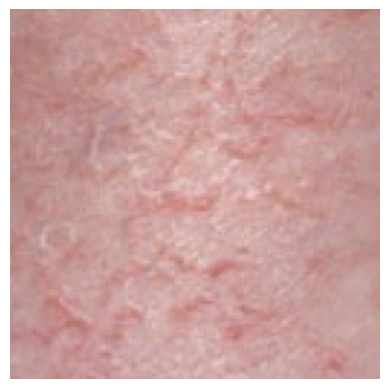

In [ ]:
# from the load_images_by_label function we load a data matrix
# this function allows us to extract one image from the outputted data matrix and display it once it's cropped
def display_image_from_matrix(X, img_shape, index):
    """
    Displays the image at the given index from the data matrix X.


    Parameters:
    - X: Data matrix of shape (n_samples, n_features)
    - img_shape: Tuple specifying the original image shape (height, width, channels)
    - index: The index of the image to display
    """
    # Get the flattened image data for the given index
    flattened_img = X[index]

    # Reshape the flattened image back to its original shape
    img_reshaped = flattened_img.reshape(img_shape)

    # Display the image using matplotlib
    plt.imshow(img_reshaped)
    plt.axis('off')  # Hide the axis


# Example usage:
# Assuming X and img_shape have been obtained from load_images_by_label
# Display the first image from the data matrix
display_image_from_matrix(X_train, img_shape, 8)

In [ ]:
#drop all values where qc is Wrongly Labelled
df = df[df['qc'] != '3 Wrongly labelled']

In [ ]:
# One hot encode categorical variables (nine_partition_label, three_partition_label)
#from sklearn.preprocessing import OneHotEncoder
# var list to encode
#to_encode = ["nine_partition_label", "three_partition_label"]

#enc = OneHotEncoder(sparse_output=False)
#df_enc = pd.DataFrame(enc.fit_transform(df[to_encode]))
#df_enc.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#df_enc.columns = enc.get_feature_names_out()
#df_enc.head()

,nine_partition_label_benign-dermal,nine_partition_label_benign-epidermal,nine_partition_label_inflammatory,nine_partition_label_malignant-cutaneous-lymphoma,nine_partition_label_malignant-dermal,nine_partition_label_malignant-epidermal,nine_partition_label_malignant-melanoma,three_partition_label_benign,three_partition_label_malignant,three_partition_label_non-neoplastic
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#df.drop(columns=to_encode, inplace=True)
#df.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,qc,ddi_scale
0,fd06d13de341cc75ad679916c5d7e6a6,4,4,prurigo-nodularis,NaN,34
1,a4bb4e5206c4e89a303f470576fc5253,1,1,basal-cell-carcinoma-morpheiform,NaN,12
2,c94ce27e389f96bda998e7c3fa5c4a2e,5,5,keloid,1 Diagnostic,56
3,ebcf2b50dd943c700d4e2b586fcd4425,3,3,basal-cell-carcinoma,NaN,34
4,c77d6c895f05fea73a8f3704307036c0,1,1,prurigo-nodularis,NaN,12


In [ ]:
#df1 = df_enc.reset_index()
#df2 = df.reset_index()
#test = pd.merge(df1, df2, left_on='index', right_on='index')
#result = test.drop(columns=['index'])
#df = result
#df

,nine_partition_label_benign-dermal,nine_partition_label_benign-epidermal,nine_partition_label_inflammatory,nine_partition_label_malignant-cutaneous-lymphoma,nine_partition_label_malignant-dermal,nine_partition_label_malignant-epidermal,nine_partition_label_malignant-melanoma,three_partition_label_benign,three_partition_label_malignant,three_partition_label_non-neoplastic,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,qc,ddi_scale
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,fd06d13de341cc75ad679916c5d7e6a6,4,4,prurigo-nodularis,NaN,34
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,a4bb4e5206c4e89a303f470576fc5253,1,1,basal-cell-carcinoma-morpheiform,NaN,12
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,c94ce27e389f96bda998e7c3fa5c4a2e,5,5,keloid,1 Diagnostic,56
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,ebcf2b50dd943c700d4e2b586fcd4425,3,3,basal-cell-carcinoma,NaN,34
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,c77d6c895f05fea73a8f3704307036c0,1,1,prurigo-nodularis,NaN,12


In [ ]:
# One hot encode categorical variables (nine_partition_label, three_partition_label)
from sklearn.preprocessing import OneHotEncoder

to_encode = ["nine_partition_label", "three_partition_label"]
enc = OneHotEncoder(sparse_output=False)
df_enc = pd.DataFrame(enc.fit_transform(df[to_encode]))

df_enc.columns = enc.get_feature_names_out()
df.drop(columns=to_encode, inplace=True)

df1 = df_enc.reset_index()
df2 = df.reset_index()
test = pd.merge(df1, df2, left_on='index', right_on='index')
result = test.drop(columns=['index'])
df = result

# Define y as the one-hot encoded labels
y = df.filter(regex='^(nine_partition_label_|three_partition_label_)').values

# Verify shape of y
print(f"Shape of y: {y.shape}")

Shape of y: (2852, 10)


<ipython-input-75-0577fd451ae1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=to_encode, inplace=True)


In [ ]:
def load_images_into_df(df, directory, image_size=(128, 128)):
    num_rows = df.shape[0]
    if 'img-vec' not in df.columns:
        df['img-vec'] = None
    image_data = []
    for i in range(num_rows):
        img_dir = df.loc[i, 'label']
        img_hash = df.loc[i, 'md5hash']
        img_path = os.path.join(os.getcwd(), directory , img_dir, img_hash + ".jpg")
        img = Image.open(img_path)

        # Get original dimensions of the image
        img_width, img_height = img.size

        # Calculate the cropping box (centered crop)
        left = (img_width - image_size[0]) // 2
        top = (img_height - image_size[1]) // 2
        right = (img_width + image_size[0]) // 2
        bottom = (img_height + image_size[1]) // 2

        # Crop the center portion of the image
        img_cropped = img.crop((left, top, right, bottom))

        # Convert image to a numpy array and flatten it and normalize it
        img_array = np.array(img_cropped).flatten()/255
        image_data.append(img_array)
    return image_data

directory = "drive/MyDrive/BTTAI Kaggle AJL Team13/bttai-ajl-2025/train/train"
image_data = load_images_into_df(df, directory)

## Modeling

### Convolutional Neural Network (CNN)

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
pip install tensorflow

In [ ]:
df = df[['md5hash','label']]
df.head()

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing images
image_dir = '/content/drive/MyDrive/BTTAI Kaggle AJL Team13/bttai-ajl-2025/train/train'

# Get all subfolders (each subfolder represents a class)
class_names = sorted(os.listdir(image_dir))

# Create a mapping from class names to indices
class_name_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}


# Function to load and preprocess an image
def load_and_process_image(image_path, label):
    # Read image file
    image = tf.io.read_file(image_path)
    # Decode the image
    image = tf.image.decode_jpeg(image, channels=3)  # Assumes images are in jpg format; adjust if necessary
    # Resize the image
    image = tf.image.resize(image, [224, 224])
    # Normalize the image
    image = image / 255.0
    return image, label

# Function to get image paths and labels
def get_image_paths_and_labels(image_dir):
    image_paths = []
    labels = []

    for subdir in os.listdir(image_dir):
        subfolder_path = os.path.join(image_dir, subdir)

        if os.path.isdir(subfolder_path):
            # Loop through all images in the subfolder
            for image_name in os.listdir(subfolder_path):
                if image_name.lower().endswith(('png', 'jpg', 'jpeg')):
                    # Build the full image path
                    image_path = os.path.join(subfolder_path, image_name)
                    # Assign the label (subfolder name) to the image
                    image_paths.append(image_path)
                    labels.append(class_name_to_index[subdir])  # Use index for class label

    return image_paths, labels

# Get all image paths and labels
image_paths, labels = get_image_paths_and_labels(image_dir)

# Create a TensorFlow Dataset from image paths and labels
image_paths = tf.constant(image_paths)
labels = tf.constant(labels)


# Create a tf.data Dataset
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

# Map the loading and preprocessing function to the dataset
dataset = dataset.map(lambda x, y: load_and_process_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=1000)

# Split the dataset into train and test (e.g., 80% train, 20% test)
# Here, we will take the first 80% for training and the remaining 20% for testing

train_size = int(0.8 * len(image_paths))  # 80% for training
test_size = len(image_paths) - train_size  # 20% for testing

# Split the dataset into train and test
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

# Batch and prefetch the datasets for better performance
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_cnn_model(input_shape=(224, 224, 3), num_classes=10):
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output for the fully connected layers
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting

    # Output layer (Softmax for multi-class classification)
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Suitable for integer labels
                  metrics=['accuracy'])

    return model

# Create the CNN model
model = create_cnn_model(input_shape=(224, 224, 3), num_classes=len(class_names))

# Print the model summary to check the architecture
model.summary()

In [ ]:
history = model.fit(train_dataset, epochs=30)
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc}")

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc}")

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the test image folder
image_folder = '/content/drive/MyDrive/BTTAI Kaggle AJL Team13/bttai-ajl-2025/test'

# Load the trained model (replace 'best_model.h5' with your model's filename if needed)
 # Load the trained model

# Function to preprocess and predict on a single image
def preprocess_and_predict(img_path, model, target_size=(224, 224)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Make prediction
    predictions = model.predict(img_array)

    # Get the predicted class index (if using softmax for multi-class classification)
    predicted_class_idx = np.argmax(predictions, axis=-1)[0]

    return predicted_class_idx, predictions
results = []
# Iterate over images in the test folder and make predictions
for subdir in os.listdir(image_folder):
    subfolder_path = os.path.join(image_folder, subdir)

    if os.path.isdir(subfolder_path):  # Ensure that we are looking at folders
        print(f"Processing images in {subdir} folder...")

        for img_name in os.listdir(subfolder_path):
            if img_name.lower().endswith(('png', 'jpg', 'jpeg')):  # Process image files only
                img_path = os.path.join(subfolder_path, img_name)

                # Preprocess image and get the prediction
                predicted_class_idx, predictions = preprocess_and_predict(img_path, model)
                        # Map the predicted class index to the class name
                predicted_class_name = class_names[predicted_class_idx]

        # Get the confidence (probability of the predicted class)
                confidence = np.max(predictions)
                # Print results
                print(f"Image: {img_name} | Predicted Class: {predicted_class_idx} | Confidence: {np.max(predictions)}")
                # Append the result to the list
                results.append([img_name, predicted_class_name, confidence])
    # Convert results to a pandas DataFrame
df = pd.DataFrame(results, columns=['Image Name', 'Predicted Class', 'Confidence'])

# Store the predictions in a CSV file
csv_output_path = '/content/drive/MyDrive/BTTAI Kaggle AJL Team13/predictions.csv'  # Change the path if needed
df.to_csv(csv_output_path, index=False)

print(f"Predictions have been saved to {csv_output_path}")

In [ ]:
# Load the CSV file into a pandas DataFrame
csv_file_path = '/content/drive/MyDrive/BTTAI Kaggle AJL Team13/predictions.csv'
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to check the columns
print("Original DataFrame:")
print(df.head())

# Remove a column (e.g., 'Confidence'). Replace 'Confidence' with the name of the column you want to remove
df = df.drop(columns=['Confidence'])

# Display the DataFrame after removing the column
print("\nDataFrame after removing 'Confidence' column:")
df.rename(columns={'Image Name': 'md5hash', 'Predicted Class': 'label'}, inplace=True)
df['md5hash'] = df['md5hash'].str.slice(0, -4)

print(df.head())

# Optionally, you can save the DataFrame back to a CSV if needed
df.to_csv('/content/drive/MyDrive/BTTAI Kaggle AJL Team13/submission_predictions.csv', index=False)

In [ ]:
print(df.shape)

MOBILENET Model

In [ ]:
# Necessary Imports
from collections import Counter
import keras
from keras import Sequential
from keras import layers
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout, Input
from keras.optimizers import Adam
from PIL import Image
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
import glob
from tqdm import tqdm

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
from PIL import Image
import os

def load_images_into_df(df, directory, image_size=(224, 224)):
    num_rows = df.shape[0]

    # Initialize an empty numpy array to store the image data
    image_data = np.empty((num_rows, image_size[0], image_size[1], 3))  # Assume images are RGB (3 channels)

    for i in range(num_rows):
        img_dir = df.loc[i, 'label']
        img_hash = df.loc[i, 'md5hash']
        img_path = os.path.join(os.getcwd(), directory , img_dir, img_hash + ".jpg")

        # Open the image using PIL
        img = Image.open(img_path)

        # Resize the image to the target size (no cropping)
        img_resized = img.resize(image_size)

        # Convert the image to a numpy array
        img_array = np.array(img_resized)

        # Apply MobileNet preprocessing (scaling pixel values)
        img_array = preprocess_input(img_array)

        # Store the processed image in the numpy array
        image_data[i] = img_array

    return image_data


In [ ]:
def load_image_labels(df):
    labels = np.array(df['label'].tolist(), dtype='str')
    label_options = df['label'].unique()
    label_to_number = {label: idx for idx, label in enumerate(label_options)}
    numeric_labels = [label_to_number[label] for label in labels]

    return np.array(numeric_labels)

In [ ]:
directory = "bttai-ajl-2025/train/train"
image_data = load_images_into_df(df, directory)

In [ ]:
image_labels = load_image_labels(df)

In [ ]:
# from the load_images_by_label function we load a data matrix
# this function allows us to extract one image from the outputted data matrix and display it once it's cropped
def display_image_from_matrix(X, img_shape, index):
    """
    Displays the image at the given index from the data matrix X.


    Parameters:
    - X: Data matrix of shape (n_samples, n_features)
    - img_shape: Tuple specifying the original image shape (height, width, channels)
    - index: The index of the image to display
    """

    img = X[index]

    # Reshape the flattened image back to its original shape
    #img_reshaped = flattened_img.reshape(img_shape)

    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide the axis


# Example usage:
# Assuming X and img_shape have been obtained from load_images_by_label
# Display the first image from the data matrix
index = 10
img_shape = (224, 224, 3)
display_image_from_matrix(image_data, img_shape, index)
print(image_labels[index])

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming image_data and image_labels are your dataframes
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2)

# One-hot encode the labels if they're integers (e.g., 0, 1, 2, ..., N-1)
num_classes = len(np.unique(y_train))  # Assuming you have a fixed number of classes
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Load the MobileNet base model without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # For multi-class classification

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers of MobileNet
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
import os
import pandas as pd
from keras.preprocessing import image
import numpy as np

# Assuming the model is already trained and you have 'class_names' defined somewhere in your code
# For example, let's assume you have a list like:
class_names = df['label'].unique()  # Update with your actual class names

# Folder where your images are stored
image_folder = os.path.join(os.getcwd(), "bttai-ajl-2025/test/test")  # Update with your folder path

# Initialize an empty list to store the results
results = []

# Loop through all images in the folder
for img_name in os.listdir(image_folder):
    if img_name.endswith('.jpg'):  # Ensure the file is a .jpg image
        # Extract the image hash from the filename (assuming it's formatted as img-hash.jpg)
        img_hash = img_name.split('.')[0]  # This gets the 'hash' part

        # Load and preprocess the image
        img_path = os.path.join(image_folder, img_name)
        img = image.load_img(img_path, target_size=(224, 224))  # Resize to 128x128
        img_array = image.img_to_array(img)  # Convert to numpy array
        img_array = img_array / 255.0  # Rescale the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make prediction
        prediction = model.predict(img_array)

        # Get the predicted class index (the highest probability)
        predicted_class_idx = np.argmax(prediction, axis=1)[0]

        # Convert the predicted class index to the actual class name
        predicted_class_name = class_names[predicted_class_idx]

        # Append the result (image hash and predicted class name)
        results.append([img_hash, predicted_class_name])

# Create a pandas DataFrame from the results
df = pd.DataFrame(results, columns=['image_hash', 'prediction'])

# Save the DataFrame to a CSV file
df.to_csv('submission_13.csv', index=False)

print("Predictions saved to sample_submission.csv")
